# Lab Instructions

Find a dataset that interests you. I'd recommend starting on [Kaggle](https://www.kaggle.com/). Read through all of the material about the dataset and download a .CSV file.

1. Write a short summary of the data.  Where did it come from?  How was it collected?  What are the features in the data?  Why is this dataset interesting to you?  

2. Identify 5 interesting questions about your data that you can answer using Pandas methods.  

3. Answer those questions!  You may use any method you want (including LLMs) to help you write your code; however, you should use Pandas to find the answers.  LLMs will not always write code in this way without specific instruction.  

4. Write the answer to your question in a text box underneath the code you used to calculate the answer.



## Summary of the Data
This dataset is an enhanced version of the original Mall Customers dataset, which was initially focused on basic demographics (age, gender, income) and a spending score. To make it more realistic and useful for deeper analysis, synthetic but logically consistent features were added. These include Age Group, Estimated Savings, Credit Score, Loyalty Years, and Preferred Category. The data was generated programmatically to reflect real-world patterns in retail and customer behavior while remaining safe to use for practice.

### Features in the Data
- Age (numeric)
- Gender (categorical)
- Income (numeric)
- Spending Score (numeric)
- Age Group (categorical, binned from Age)
- Estimated Savings (numeric, derived)
- Credit Score (numeric, simulated)
- Loyalty Years (numeric, simulated)
- Preferred Category (categorical: Luxury, Budget, Fashion, Electronics)

## 5 Interesting Questions to Explore with Pandas

1. Which Age Group contributes the most to high spending scores, and how does this vary across income levels?
2. What is the relationship between Credit Score and Estimated Savings?
3. Do customers with longer Loyalty Years tend to prefer certain Preferred Categories?
4. How does Gender distribution vary across different Preferred Categories?
5. Can we identify clusters of customers who have high income but low spending scores, and what features distinguish them?

### Question 1: Which Age Group contributes the most to high spending scores, and how does this vary across income levels?

<Axes: title={'center': 'Average Spending Score and Income by Age Group'}, xlabel='Age Group'>

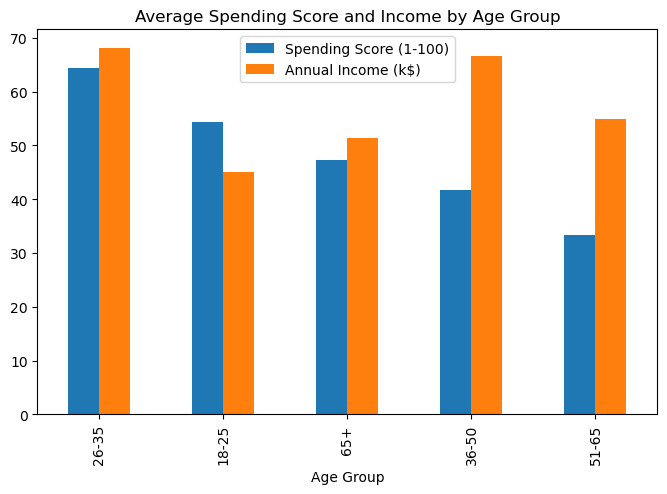

In [17]:
import pandas as pd
df = pd.read_csv('Mall_Customers_Enhanced.csv', encoding='ISO-8859-1')
# Table
age_group_spending = df.groupby("Age Group")[["Spending Score (1-100)", "Annual Income (k$)"]].mean().sort_values("Spending Score (1-100)", ascending=False)

# Graph
age_group_spending.plot(kind="bar", figsize=(8,5), title="Average Spending Score and Income by Age Group")

Answer: The 26-35 age range contributes the most to high spending scores. The bar chart makes it easy to see which Age Group spends the most and how their income compares.

### Question 2: What is the relationship between Credit Score and Estimated Savings?

<Axes: title={'center': 'Credit Score vs Estimated Savings'}, xlabel='Estimated Savings (k$)', ylabel='Credit Score'>

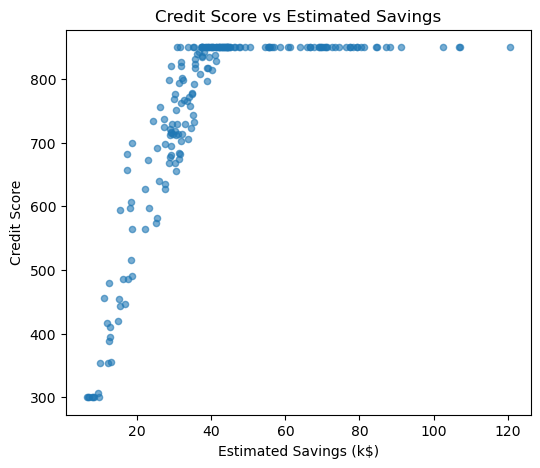

In [18]:
# Table
correlation = df["Credit Score"].corr(df["Estimated Savings (k$)"])

# Graph
df.plot.scatter(x="Estimated Savings (k$)", y="Credit Score", alpha=0.6, figsize=(6,5), title="Credit Score vs Estimated Savings")

Answer: The scatter plot shows how tightly savings and credit scores move together.

### Question 3: Do customers with longer Loyalty Years tend to prefer certain Preferred Categories?

<Axes: title={'center': 'Average Loyalty Years by Preferred Category'}, xlabel='Preferred Category'>

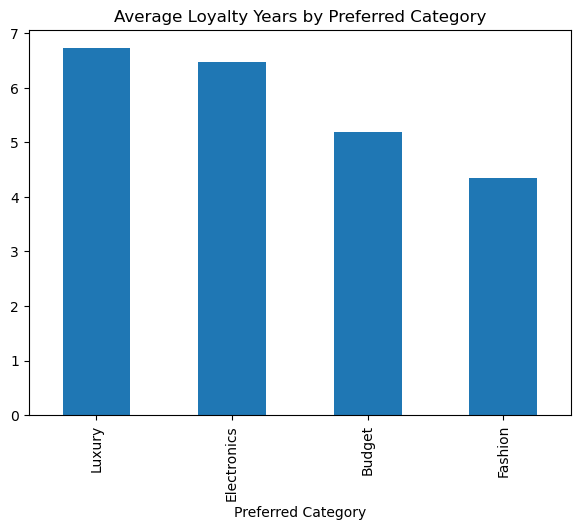

In [14]:
# Table
loyalty_by_category = df.groupby("Preferred Category")["Loyalty Years"].mean().sort_values(ascending=False)
loyalty_by_category

# Graph
loyalty_by_category.plot(kind="bar", figsize=(7,5), title="Average Loyalty Years by Preferred Category")

Answer: Yes! The bar chart reveals that the Luxury and Electronics categories attract the most long-term customers.

### Question 4: How does Gender distribution vary across different Preferred Categories?

<Axes: title={'center': 'Gender Distribution by Preferred Category'}, xlabel='Preferred Category'>

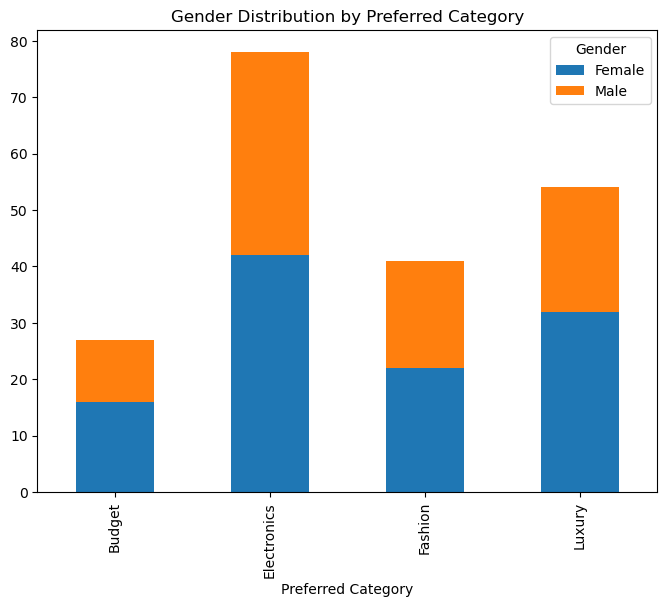

In [15]:
# Table
gender_distribution = df.groupby(["Preferred Category", "Gender"]).size().unstack(fill_value=0)
gender_distribution

# Graph
gender_distribution.plot(kind="bar", stacked=True, figsize=(8,6), title="Gender Distribution by Preferred Category")

Answer: The stacked bar chart makes it easy to compare categories side by side.

### Question 5: Can we identify clusters of customers who have high income but low spending scores, and what features distinguish them?

<Axes: title={'center': 'Preferred Categories of High Income, Low Spending Customers'}, xlabel='Preferred Category'>

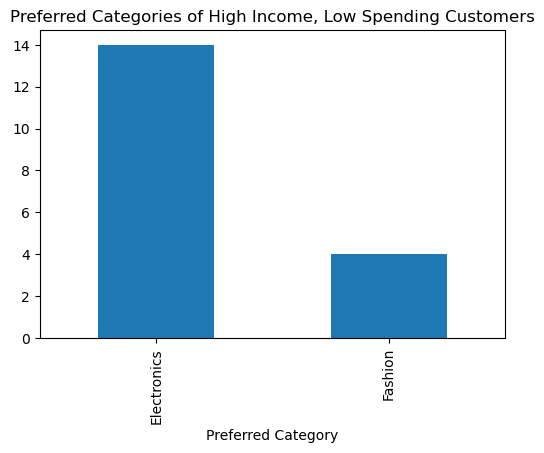

In [16]:
# Define high income (above 75th percentile) and low spending (below 25th percentile)
df["HighIncomeLowSpend"] = (df["Annual Income (k$)"] > df["Annual Income (k$)"].quantile(0.75)) & (df["Spending Score (1-100)"] < df["Spending Score (1-100)"].quantile(0.25))

# Table: Summary stats of this group
high_income_low_spend = df[df["HighIncomeLowSpend"]]
high_income_low_spend.describe(include="all")

# Graph: Which categories they prefer
high_income_low_spend["Preferred Category"].value_counts().plot(kind="bar", figsize=(6,4), title="Preferred Categories of High Income, Low Spending Customers")

Answer: The bar chart reveals that a key feature of high income, low spending customers is that they prefer the Electronics category.